In [4]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from plot_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from matplotlib import ticker

# electron selection efficiency as a function of  calorimetry variables
using single-particle electron gun simulations from build fb01759

In [8]:
main_data_path = '/Users/erezcohen/Desktop/data/EIC/ECCE/ElectronPionPID/EvalFiles/fb01759/';
e_path = main_data_path + '/singleElectron/CSVfiles/'

In [36]:
e_calin = pd.read_csv(e_path + 'calin.csv');
e_calout = pd.read_csv(e_path + 'calout.csv');

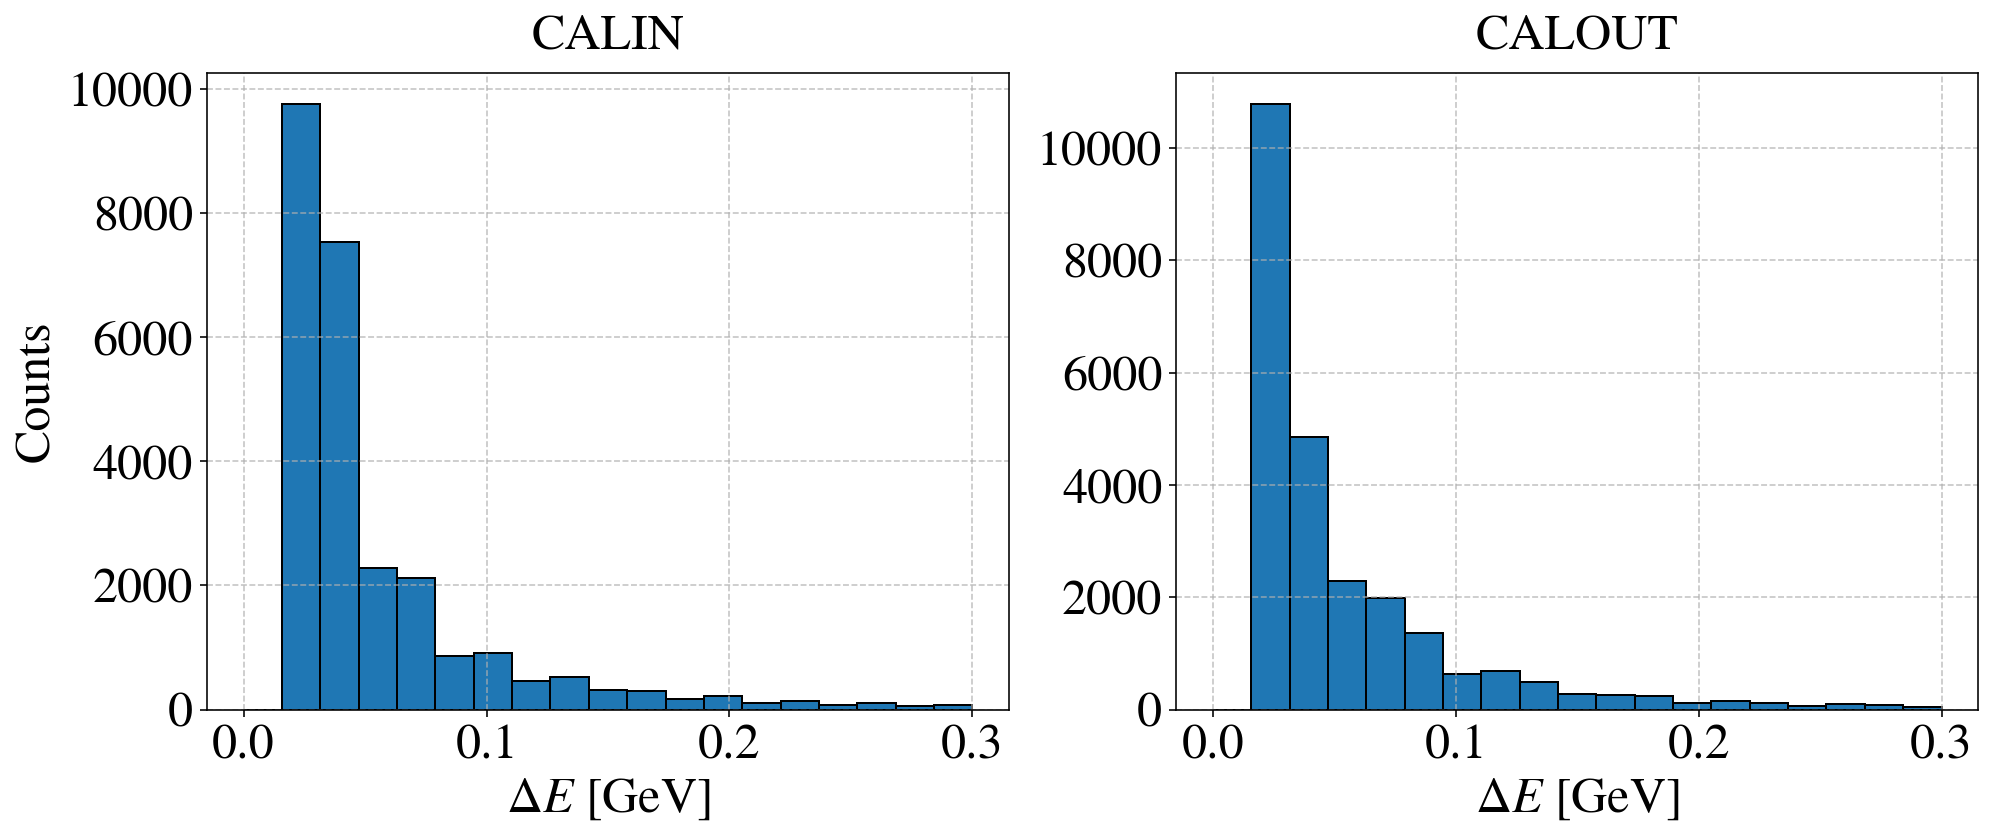

In [37]:
E_bins = np.linspace(0,0.3,20) # GeV?
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1,2,1);
ax.hist(e_calin.e,E_bins,edgecolor='k');
set_axes(ax,'$\Delta E$ [GeV]','Counts',title='CALIN',do_add_grid=True,xticks=(0.,0.1,0.2,0.3))


ax = fig.add_subplot(1,2,2);
ax.hist(e_calout.e,E_bins,edgecolor='k');
set_axes(ax,'$\Delta E$ [GeV]','',title='CALOUT',do_add_grid=True,xticks=(0.,0.1,0.2,0.3));


plt.tight_layout()

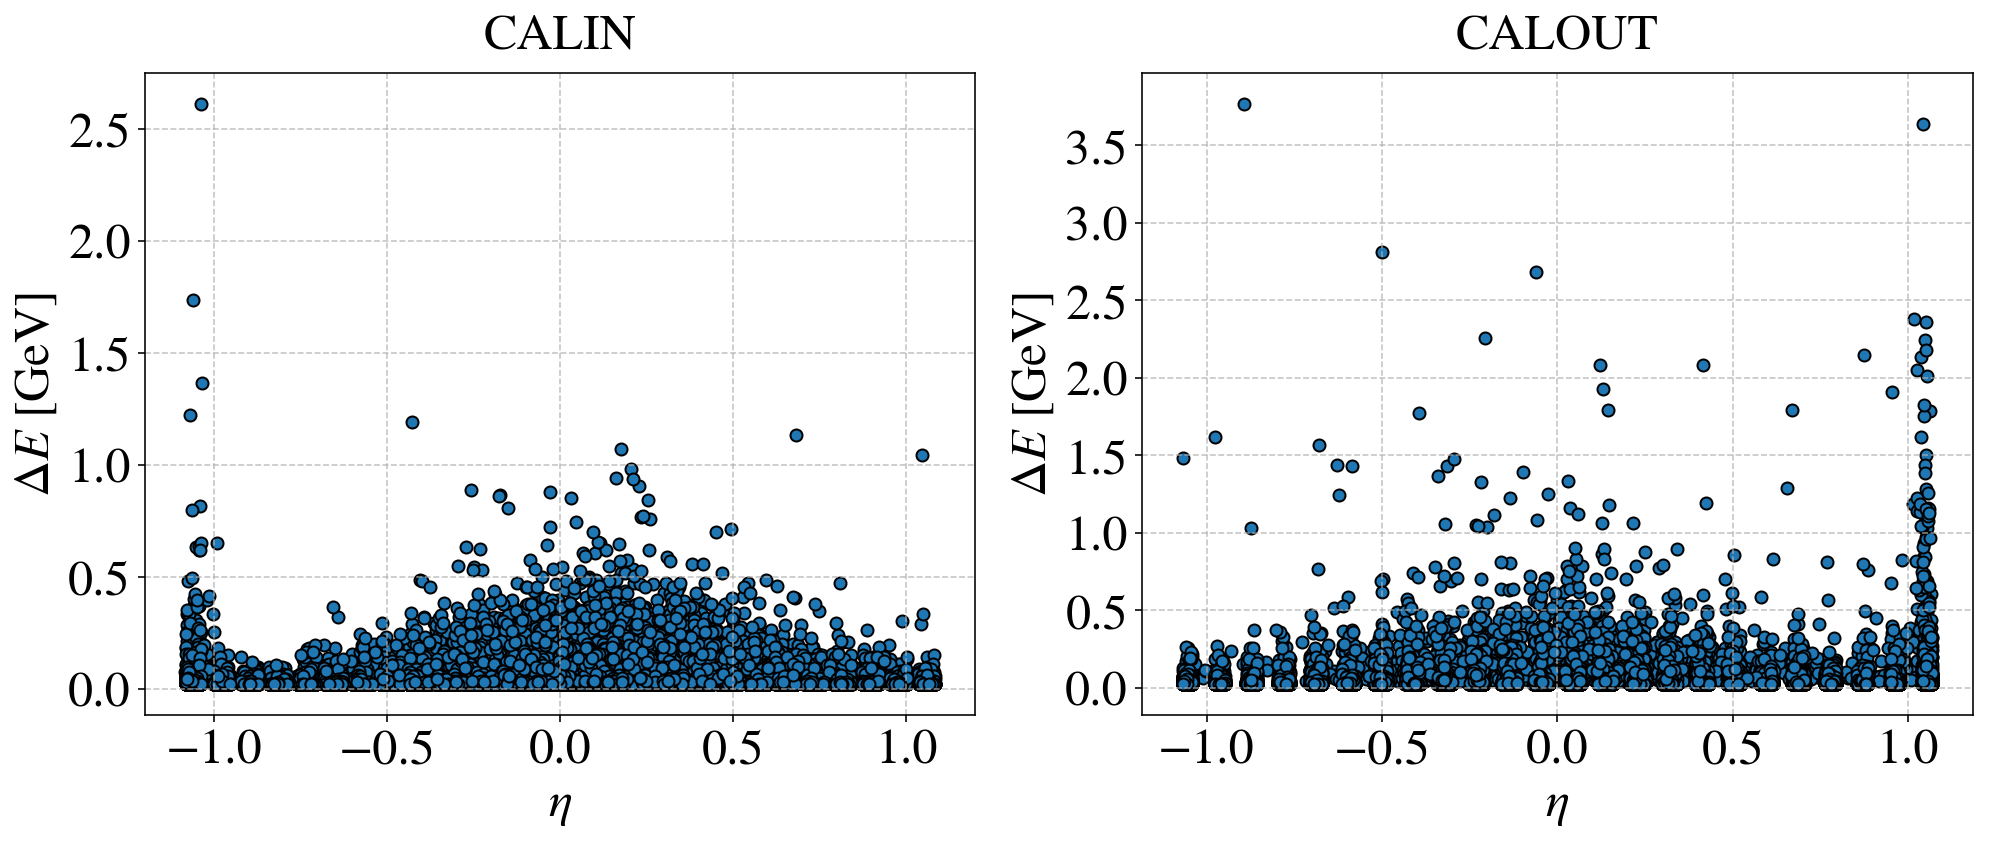

In [38]:
# eta_bins = np.linspace(-3,3,20) # GeV?
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1,2,1);
ax.scatter( e_calin.eta, e_calin.e,edgecolor='k');
set_axes(ax,'$\eta$','$\Delta E$ [GeV]',title='CALIN',do_add_grid=True)

ax = fig.add_subplot(1,2,2);
ax.scatter( e_calout.eta, e_calout.e,edgecolor='k');
set_axes(ax,'$\eta$','$\Delta E$ [GeV]',title='CALOUT',do_add_grid=True)

plt.tight_layout()